In [1]:
# !pip install statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

## Importing Data

In [3]:
df=pd.read_csv("Dal_Price.csv")

In [4]:
df.head()

,Month,Price
0,2014-01,43.70
1,2014-02,42.32
2,2014-03,43.61
3,2014-04,43.38
4,2014-05,42.39


## Data Cleaning

In [5]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,2014-01,43.70
1,2014-02,42.32
2,2014-03,43.61
3,2014-04,43.38
4,2014-05,42.39


In [6]:
df.shape

(129, 2)

In [7]:
df.isnull().sum()

Month    1
Sales    0
dtype: int64

In [8]:
df.tail()

,Month,Sales
124,2024-05,80.56
125,2024-06,82.84
126,2024-07,84.23
127,2024-08,86.07
128,NaN,73.23


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(128, 2)

Month column contains date format so we will convert it to datetime datatype

In [11]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [12]:
df['Month'] = pd.to_datetime(df['Month'])

In [13]:
# df.dtypes

In [14]:
# df.head()

We will use month values as index value

In [15]:
df.set_index('Month', inplace=True)

In [16]:
df.head()

,Sales
Month,
2014-01-01,43.70
2014-02-01,42.32
2014-03-01,43.61
2014-04-01,43.38
2014-05-01,42.39


In [17]:
# df.describe()

<Axes: xlabel='Month'>

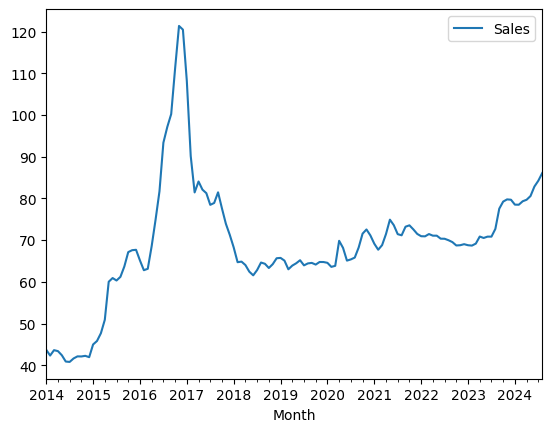

In [18]:
df.plot()

As seen below, our data is seasonal. Seasonality occurs when time series data exhibits regular and predictable patterns at time intervals that are smaller than a year.

In [19]:
# adfuller(df['Sales'])

In [20]:
# def adfuller_test(sales):
#     result = adfuller(sales)
    
# #     labels = ['ADF test statistics', 'p-value', 'Lags used', 'Number of obs used']
    
#     for value, label in zip(result, labels):
#         print('{} : {} '.format(label, value))
        
#     if result[1]<=0.05:
#         print('Strong evidence against null hypothesis, reject the null hypothesis and data is stationary')
#     else:
#         print('Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary')

In [21]:
# adfuller_test(df['Sales'])

As seen above, the p-value of the ADF test is greater than 0.05, so our data is not stationary. For time series use case we have to make our data stationary.

In [22]:
# df

In [23]:
# df['Sales'].shift(1)

In [24]:
# df['Sales first diff.'] = df['Sales'] - df['Sales'].shift(1)

In [25]:
# df.head()

We shift by 12 month cycle

In [26]:
# df['Seasonal first diff.'] = df['Sales'] - df['Sales'].shift(12)

In [27]:
# df.head()

In [28]:
# adfuller_test(df['Seasonal first diff.'].dropna())

In [29]:
# df['Seasonal second diff.'] = df['Seasonal first diff.'] - df['Seasonal first diff.'].shift(12)

In [30]:
# adfuller_test(df['Seasonal second diff.'].dropna())

In [31]:
# df['Seasonal third diff.'] = df['Seasonal second diff.'] - df['Seasonal second diff.'].shift(12)

In [32]:
# adfuller_test(df['Seasonal third diff.'].dropna())

Now our data is stationary 

In [33]:
# df['Seasonal third diff.'].plot()

C:\Users\Tushar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Tushar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Tushar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


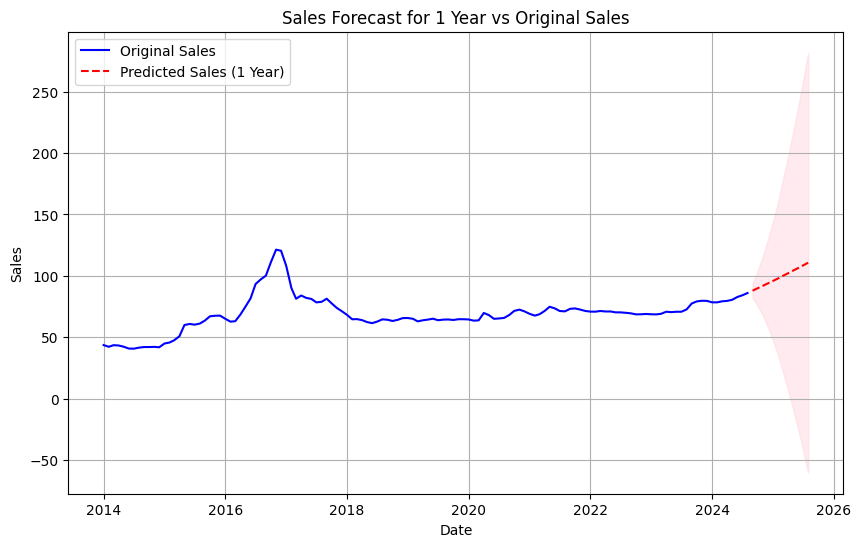

In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame 'df'
# Example: df = pd.read_csv('path_to_your_data.csv')

# Define and fit the ARIMA model (adjust (p,d,q) based on your data)
model = ARIMA(df['Sales'], order=(1, 3, 1))
model_fit = model.fit()

# Forecast for 12 months (1 year ahead)
forecast = model_fit.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a date index for the forecasted values (12 months)
forecast_dates = pd.date_range(start=df.index[-1], periods=12, freq='M')

# Plotting the original data and the forecast
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(df.index, df['Sales'], label='Original Sales', color='blue')

# Plot the forecasted values for 1 year (12 months)
plt.plot(forecast_dates, forecast_values, label='Predicted Sales (1 Year)', color='red', linestyle='--')

# Optional: Add confidence intervals for the forecast
plt.fill_between(forecast_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for 1 Year vs Original Sales')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [35]:


# Forecast for 12 months (5 year ahead)
forecast5 = model_fit.get_forecast(steps=60)
forecast_values_5 = forecast.predicted_mean
forecast_ci_5 = forecast.conf_int()

# Create a date index for the forecasted values (5 months)
forecast_dates5 = pd.date_range(start=df.index[-1], periods=12, freq='MS')
year=int(input("Enter year to Predict"))
month=int(input("Enter month to predict"))
date=str(year)+"-"+"0"+str(month)+"-"+"01"
date
forecast_values_5.loc[date]

Enter year to Predict 2025
Enter month to predict 12


KeyError: '2025-012-01'

In [ ]:
import pickle

In [ ]:
# with open('model','wb') as f:
#     pickle.dump(model,f)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(data, order=(p, d, q))  # Replace with actual data and parameters
model_fit = model.fit()

# Save the fitted model
with open('model.pkl', 'wb') as file:
    pickle.dump(model_fit, file)
